In [1]:
from matplotlib import rcParams


rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 75
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    '''Minimize chartjunk by stripping out unnecessary plot borders and axis
    ticks.  The top/right/left/bottom keywords toggle whether the
    corresponding plot border is drawn.'''
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    # Turn off all ticks.
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    # Now re-enable visible.
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [3]:
import numpy as np


CT = np.linspace(0, 20, 100)
SA = np.linspace(30, 36, 100)
CT, SA = np.meshgrid(CT, SA)

In [4]:
import gsw


sigma_theta = gsw.sigma0_CT_exact(SA, CT)

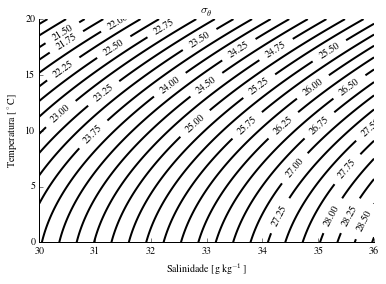

In [5]:
levels = np.arange(np.floor(sigma_theta.min()),
                   np.ceil(sigma_theta.max()), 0.25)
fig, ax = plt.subplots()
cs = ax.contour(SA, CT, sigma_theta, colors='k', levels=levels)
ax.clabel(cs, fmt='%2.2f')
remove_border(ax, top=False, right=False)
ax.set_title(r"$\sigma_{\theta}$")
ax.set_ylabel(r"Temperatura [$^{\circ}$C]")
_ = ax.set_xlabel(r"Salinidade [g kg$^{-1}$]")

In [6]:
import os


fname = "sigma_theta.png"
fig.savefig(fname, transparent=True)
_ = os.system('convert -trim %s %s' % (fname, fname))